In [21]:
import matplotlib.pyplot as plt 
import pandas as pd 

df = pd.read_csv("./Users/merrheimmaissane/articles_eco.csv")
df.head()

,Unnamed: 0,Headline,Positive,Negative,Neutral
0,0,Fresh Bitcoin Hype Shows Crypto Just Can’t Hel...,0.065999,0.360730,0.573271
1,1,How to Buy Bitcoin Minetrix in 2023 – Complete...,0.075065,0.013057,0.911877
2,2,'We have no intention of selling': El Salvador...,0.177220,0.116055,0.706725
3,3,Scammers Are Tricking Anti-Vaxxers Into Buying...,0.020979,0.557952,0.421069
4,4,El Salvador Bitcoin bonds clear regulatory hurdle,0.151715,0.042901,0.805384


In [22]:
new_df = df
new_df['Sentiment'] = ''

for i in range (len(df)):
    if df['Positive'][i]>=0.7:
        new_df['Sentiment'][i]="Positive"
    else : 
        if df['Neutral'][i]>=0.6:
            new_df['Sentiment'][i]="Neutral"
        else : 
            if df['Neutral'][i]>df['Negative'][i]:
                new_df['Sentiment'][i]="Neutral"
            else : 
                new_df['Sentiment'][i]="Negative"

new_df


/var/folders/ym/71jgxz4j2rz863lgsp_17w240000gn/T/ipykernel_95684/1557496519.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sentiment'][i]="Neutral"
/var/folders/ym/71jgxz4j2rz863lgsp_17w240000gn/T/ipykernel_95684/1557496519.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sentiment'][i]="Neutral"
/var/folders/ym/71jgxz4j2rz863lgsp_17w240000gn/T/ipykernel_95684/1557496519.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,Unnamed: 0,Headline,Positive,Negative,Neutral,Sentiment
0,0,Fresh Bitcoin Hype Shows Crypto Just Can’t Hel...,0.065999,0.360730,0.573271,Neutral
1,1,How to Buy Bitcoin Minetrix in 2023 – Complete...,0.075065,0.013057,0.911877,Neutral
2,2,'We have no intention of selling': El Salvador...,0.177220,0.116055,0.706725,Neutral
3,3,Scammers Are Tricking Anti-Vaxxers Into Buying...,0.020979,0.557952,0.421069,Negative
4,4,El Salvador Bitcoin bonds clear regulatory hurdle,0.151715,0.042901,0.805384,Neutral
...,...,...,...,...,...,...
95,95,Why Bitcoin continued its rally,0.305943,0.024017,0.670040,Neutral
96,96,DEMAND Announce Bitcoin Stratum V2 Mining Pool,0.187688,0.012343,0.799969,Neutral
97,97,Bitcoin Fees Surge Reinforcing The Network's A...,0.939783,0.027980,0.032237,Positive
98,98,Pullback Canceled UNTIL $__K Bitcoin!,0.030394,0.105643,0.863963,Neutral


In [23]:
new_df = new_df.drop('Positive',axis=1)
new_df = new_df.drop('Negative',axis=1)
new_df = new_df.drop('Neutral',axis=1)
new_df = new_df.drop('Unnamed: 0',axis=1)

In [24]:
new_df

,Headline,Sentiment
0,Fresh Bitcoin Hype Shows Crypto Just Can’t Hel...,Neutral
1,How to Buy Bitcoin Minetrix in 2023 – Complete...,Neutral
2,'We have no intention of selling': El Salvador...,Neutral
3,Scammers Are Tricking Anti-Vaxxers Into Buying...,Negative
4,El Salvador Bitcoin bonds clear regulatory hurdle,Neutral
...,...,...
95,Why Bitcoin continued its rally,Neutral
96,DEMAND Announce Bitcoin Stratum V2 Mining Pool,Neutral
97,Bitcoin Fees Surge Reinforcing The Network's A...,Positive
98,Pullback Canceled UNTIL $__K Bitcoin!,Neutral


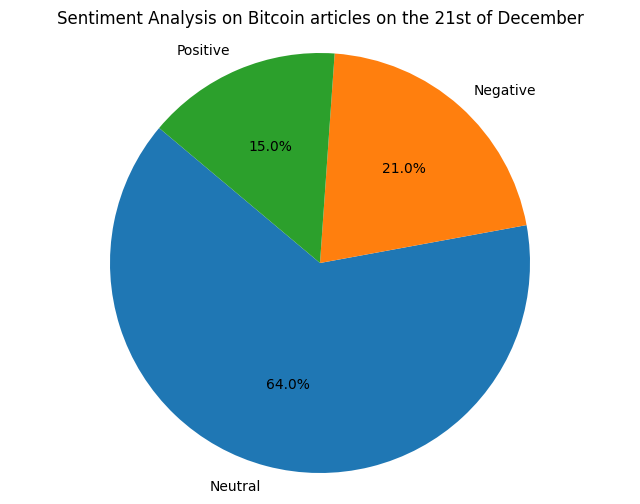

In [26]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis on Bitcoin articles on the 21st of December')
plt.axis('equal')  
plt.show()